In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

import pprint


## Part 1: Getting the Data





In [2]:
#######################
import myauz
from myauz.myalpha_funcs import (
    read_data,
    persist_data,
    update_csv,
    compose_portfolio,
    retrieveDF,
    string2date,
    retrievePF,
    initialize_df,
    time_sleep,
    create_path_list,
    refresh_db,
    get_daily_symbol,
)

from myauz.myalpha_optimize import (
    pf_filtered,
    symbol_list_filtered,
    determine_earliest_notation,
    calc_weights,
    get_ret_vol_sr,
    neg_sharpe,
    check_sum,
    minimize_volatility,
)


#import importlib
#importlib.reload(myauz.myalpha_funcs)

from myauz.myalpha_libs_universal import StocksDb

import pprint


from datetime import date
#from datetime import datetime
import datetime
import pandas as pd



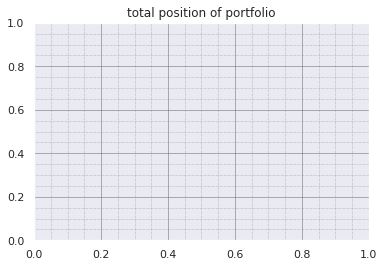

In [3]:
import seaborn as sns 
sns.set()
#sns.reset_orig
plt.figure()
plt.title("total position of portfolio")
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

In [4]:
alphaDB = StocksDb()
alphaDB.check_path()
print("\n", alphaDB.api_key_alpha)


api_key_alpha = alphaDB.api_key_alpha
root_path = alphaDB.path
print('root_path: ',root_path)

read_from_alphavantage = True
rename_column = True


usecols = ["timestamp", "close"]
startd = "2020-01-01"
# endd = "2020-12-31"
#from datetime import datetime
endd = datetime.datetime.today().strftime('%Y-%m-%d')
print('usecols:', usecols)
print('startd',startd)
print('endd',endd)


Directory  /home/pi/Documents/Python/data  already exists

 JP7SMFY0WV365JKL
root_path:  /home/pi/Documents/Python
usecols: ['timestamp', 'close']
startd 2020-01-01
endd 2021-12-28


In [5]:

symbol_list_full_refresh = [
    "SPY",
]
full_refresh_alphavantage = False

refresh_db(root_path, api_key_alpha, symbol_list_full_refresh, full_refresh_alphavantage)


processing symbol: SPY
('last stock-date available from alpha_vantage:', '2021-12-27')
('Directory ', '/home/pi/Documents/Python/data/SPY', ' already exists')
('number of entries we need to append to csv:', 500)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Python/data/SPY', ' already exists')


In [6]:
# importcsv data from alpha_vantage from scratch (everything since year 2000) and store it in data folder
#create a data folder
#example: import csv data for Procter&Gamble and SPY (etf which mimicks S&P 500 index)
#you alway need to import and store a symbol once you can work with its csv.
#if you don't the ticker symbol use alpha vantage for google sheets functionality (extension)
#after importing extension and registered you api_key use formula =AVSearchEquitySymbol("<some symbol_description")
#example: =AVSearchEquitySymbol("bayer") this will output for example the ticker-symbol: BAYN.DEX

symbol_list = [
   "MSFT",
   "GOOG",    
   "DHR",
   "EMR",
   "ATR",
]

# persist_data(symbol_list_full_refresh, _dict, _path_list)

refresh_db(root_path, api_key_alpha, symbol_list, full_refresh_alphavantage)


processing symbol: MSFT
('last stock-date available from alpha_vantage:', '2021-12-27')
('Directory ', '/home/pi/Documents/Python/data/MSFT', ' already exists')
('number of entries we need to append to csv:', 500)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Python/data/MSFT', ' already exists')

processing symbol: GOOG
('last stock-date available from alpha_vantage:', '2021-12-27')
('Directory ', '/home/pi/Documents/Python/data/GOOG', ' already exists')
('number of entries we need to append to csv:', 500)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Python/data/GOOG', ' already exists')

processing symbol: DHR
('last stock-date available from alpha_vantage:', '2021-12-27')
('Directory ', '/home/pi/Documents/Python/data/DHR', ' already exists')
('number of entries we need to append to csv:', 500)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Py

In [7]:
symbol_list = [
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
]

# persist_data(symbol_list_full_refresh, _dict, _path_list)

refresh_db(root_path, api_key_alpha, symbol_list, full_refresh_alphavantage)

symbol_list = [
   "HXGBY",
   "LDSVF", 
]

# persist_data(symbol_list_full_refresh, _dict, _path_list)

refresh_db(root_path, api_key_alpha, symbol_list, full_refresh_alphavantage)


# see if specific symbol exists in alpha-vantage db
"""

symbol = "4GP.FRK"
function="TIME_SERIES_DAILY_ADJUSTED"
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={api_key_alpha}&datatype=csv"
_df = pd.read_csv(url)
_df.head()¿

"""


processing symbol: NVS
('last stock-date available from alpha_vantage:', '2021-12-27')
('Directory ', '/home/pi/Documents/Python/data/NVS', ' already exists')
('number of entries we need to append to csv:', 500)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Python/data/NVS', ' already exists')

processing symbol: NVZMY
('last stock-date available from alpha_vantage:', '2021-12-27')
('Directory ', '/home/pi/Documents/Python/data/NVZMY', ' already exists')
('number of entries we need to append to csv:', 500)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Python/data/NVZMY', ' already exists')

processing symbol: CL
('last stock-date available from alpha_vantage:', '2021-12-27')
('Directory ', '/home/pi/Documents/Python/data/CL', ' already exists')
('number of entries we need to append to csv:', 500)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Pyth

'\n\nsymbol = "4GP.FRK"\nfunction="TIME_SERIES_DAILY_ADJUSTED"\nurl = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={api_key_alpha}&datatype=csv"\n_df = pd.read_csv(url)\n_df.head()¿\n\n'

In [8]:
symbol_list_short = [
    "PG",
    "AMZN",
    "SPY",
]


refresh_db(root_path, api_key_alpha, symbol_list_short, full_refresh_alphavantage)


processing symbol: PG
('last stock-date available from alpha_vantage:', '2021-12-27')
('Directory ', '/home/pi/Documents/Python/data/PG', ' already exists')
('number of entries we need to append to csv:', 500)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Python/data/PG', ' already exists')

processing symbol: AMZN
('last stock-date available from alpha_vantage:', '2021-12-27')
('Directory ', '/home/pi/Documents/Python/data/AMZN', ' already exists')
('number of entries we need to append to csv:', 500)
retrieving head data from csv
the final csv to be updated
('Directory ', '/home/pi/Documents/Python/data/AMZN', ' already exists')

processing symbol: SPY


KeyError: "None of ['timestamp'] are in the columns"

In [ ]:
#symbol_list = ["DHR", "GOOG"]

symbol_list = [
   "MSFT",
   "GOOG",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

path_list = create_path_list(symbol_list, root_path)
pprint.pprint(path_list)

bool_list_all = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
#  True, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

bool_list_high_tech = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
#  True, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_industry = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
#  False, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_consumer = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
#  False, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

colors = [
    'magenta',
    'lime',
#   'orange',
    'blue',
    'black',
    'slategrey',
    'brown',
    'olive',
    'darkviolet',
    'red',
    'turquoise',
    'forestgreen',
    'gold',
]

color_dict = dict(zip(symbol_list, colors))
print('\n')
print(color_dict)


In [ ]:
### create dataframe with portfolio adjusted close
usecols = ["timestamp", "close"]
pf = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf) 

In [ ]:
#startd_new = string2date('2020-07-01')
#endd_new = string2date('2020-08-01')


startd = '2020-01-01'
included = bool_list_high_tech
#pf1 = pf.loc[startd:,:]
#pf1 = pf.loc[startd:,bool_list_consumer]
#pf1_vol = pf_vol.loc[startd:,:]
#pf1_vol = pf_vol.loc[startd:,bool_list_consumer]
pf1 = pf_filtered(pf,startd,included)
pf2 = pf_filtered(pf,startd,bool_list_industry)
pf3 = pf_filtered(pf,startd,bool_list_consumer)
pprint.pprint(pf1.head(3))
print('\n')


In [ ]:
startd

In [ ]:
endd

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [ ]:
#tesla['returns']
#(1+tesla['returns'])
#(1+tesla['returns']).cumprod()
df_returns = (pf/pf.shift(1))-1
pprint.pprint(df_returns['MSFT'])
print('\n')
(1+df_returns['MSFT']).cumprod()

In [ ]:
#tesla['cumRet']=(1+tesla['returns']).cumprod()
#tesla.head(10)
#gm['cumRet']=(1+gm['returns']).cumprod()
#ford['cumRet']=(1+ford['returns']).cumprod()

df_cumReturns = initialize_df(symbol_list, startd, endd)
df_cumReturns = (1+df_returns).cumprod()
df_cumReturns.head()



In [ ]:
#tesla['cumRet'].plot(label='Tesla', figsize=(16,8))
#gm['cumRet'].plot(label='gm', figsize=(16,8))
#ford['cumRet'].plot(label='Ford', figsize=(16,8));
import seaborn as sns 
sns.set()
#sns.reset_orig
plt.figure()

color_list = [color_dict.get(x, _) for x in pf.columns]
df_cumReturns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in pf1.columns]
df_cumReturns[['MSFT','GOOG']].plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);



In [ ]:
(pf / pf.iloc[0] * 100).plot(figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in ['NVS','HEINY','EMR']]
(pf[['NVS','HEINY','EMR']] / pf[['NVS','HEINY','EMR']].iloc[0] * 100).plot(color=color_list,figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

In [ ]:
df_returns.head()
sns.reset_orig()

color_list = [color_dict.get(x, _) for x in df_returns.columns]

color_list

df_returns.plot(color=color_list, figsize=(16,8));
(df_returns / df_returns.iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.9);

(df_returns[['HEINY']] / df_returns[['HEINY']].iloc[1]).plot(color='forestgreen',figsize=(16,8));




In [ ]:
color_list = [color_dict.get(x, _) for x in ['ATR','HXGBY','NVS','NVZMY','CL','MCD']]
(df_returns[['ATR','HXGBY','NVS','NVZMY','CL','MCD']] / df_returns[['ATR','HXGBY','NVS','NVZMY','CL','MCD']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.9);


In [ ]:
color_list = [color_dict.get(x, _) for x in ['ATR','HXGBY','NVS','NVZMY','MCD']]
(df_returns[['ATR','HXGBY','NVS','NVZMY','MCD']] / df_returns[['ATR','HXGBY','NVS','NVZMY','MCD']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.9);


** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

In [ ]:
color_list = [color_dict.get(x, _) for x in ['ATR','HXGBY','NVZMY']]
(df_returns[['ATR','HXGBY','NVZMY']] / df_returns[['ATR','HXGBY','NVZMY']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.6);


In [ ]:
color_list = [color_dict.get(x, _) for x in ['HXGBY','NVZMY']]
(df_returns[['HXGBY','NVZMY']] / df_returns[['HXGBY','NVZMY']].iloc[1]).plot(color=color_list,figsize=(16,8), alpha=0.6);



# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!

In [ ]:
#del [_df]
#gc.collect()
#_df=pd.DataFrame()
symbol_list = [
   "MSFT",
   "GOOG",    
   "AMZN",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

usecols = ["timestamp", "close"]

path_list = create_path_list(symbol_list, root_path)
pprint.pprint(path_list)
df_aux1 = retrievePF(symbol_list, path_list, startd, endd,usecols)
df_aux1.head()
        

In [ ]:
print('root_path:',root_path)

#  Sharpe RATIO

In [ ]:

symbol_list=['AAPL','AMZN','CSCO','MSFT']
startd='2012-01-01'
endd='2017-01-01'
for symbol in symbol_list:
    if symbol == 'AAPL':
        aapl = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)

    elif symbol == 'AMZN':
        amzn = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)
  
    elif symbol == 'CSCO':
        csco = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)
 
    elif symbol == 'MSFT':
        msft = get_daily_symbol(symbol,root_path,startd,endd)
        print("symbol: " + symbol)


In [ ]:
aapl.iloc[0]['close']

In [ ]:
# cumulative returns:
for stock in (aapl, csco, amzn, msft):
    stock['cum_return'] = stock['close'] / stock.iloc[0]['close']

    

In [ ]:
aapl.head()

In [ ]:
aapl.tail()

In [ ]:
# a list of tuples (first element is the dataframe of the stock and second element is 0.3)
list(zip((aapl, csco, amzn, msft), [.3, .2, .4, .1]));

In [ ]:
aapl.head()

In [ ]:
# allocation to portfolio
# 30% aapl
# 20% amzn
# 40% csco
# 10% msft
aapl.head()
for stock, weight in zip((aapl, csco, amzn, msft), [.3, .2, .4, .1]):
    stock['weight'] = stock['cum_return']*weight
    
    




In [ ]:
aapl.head()
# 30% of my money is in apple so this is my cum return portfolio wise

In [ ]:
#investing 1Mio $ - calculate the position value of each stock according to its weight in the portfolio
for stock in (aapl, csco, amzn, msft):
    stock['pos_value'] = stock['weight']*100000
    
    

In [ ]:
aapl.head()

In [ ]:
all_pos_vals = [aapl['pos_value'], csco['pos_value'], amzn['pos_value'], msft['pos_value']]
#all_pos_vals
pf = pd.concat(all_pos_vals, axis = 1)
pf.columns = ['aapl', 'csco', 'amzn', 'msft']
pf.head()

In [ ]:
# total position
pf['total_pos']=pf.sum(axis=1)
pf.head()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
pf['total_pos'].plot(figsize=(10,8))
plt.title('total portfolio value ');

In [ ]:
pf.drop('total_pos', axis = 1).plot(figsize=(10,8));

In [ ]:
pf['daily_return']= pf['total_pos'].pct_change(1)
pf.head()

In [ ]:
pf['daily_return'].std()

In [ ]:
pf['daily_return'].mean()

In [ ]:
pf['daily_return'].plot(kind='kde', figsize=(16,8))

In [ ]:
cum_return = 100 * ((pf['total_pos'][-1] - pf['total_pos'][0])/pf['total_pos'][0] )
cum_return

In [ ]:
pf['total_pos'][-1]

In [ ]:
#calculate sharpe ratio assume risk-free rate to be zero
sharp_ratio = pf['daily_return'].mean() / pf['daily_return'].std()
sharp_ratio

In [ ]:
# annualize thi sr 
# asr should be above 1 

sharp_ratio_annual = (252**0.5)*sharp_ratio
sharp_ratio_annual

# portfolio optimization
# - monte carlo
# - mathematical optimization by minimizing the negative sharpe ratio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
    

In [ ]:
pf = pd.concat([aapl['adjusted_close'],csco['adjusted_close'],amzn['adjusted_close'], msft['adjusted_close']], axis=1)

pf.columns = ['aapl', 'csco', 'amzn', 'msft']

pf.head()

In [ ]:
#calculate annual mean of returns as % 
pf.pct_change(1).mean()*252

In [ ]:
pf.pct_change(1).corr()

In [ ]:
# we use log returns for algorithms especially for normalizations
log_ret= np.log(pf/pf.shift(1))

log_ret.head()


In [ ]:
log_ret.hist(bins=100, figsize=(12,8));

In [ ]:
log_ret.mean()

In [ ]:
log_ret.var()*252
#log_ret.std()*252**0.5

In [ ]:
log_ret.cov() * 252

In [ ]:
np.random.seed(101)
# to keep getting the same random weights

print(pf.columns)
weights = np.array(np.random.random(4))
print(weights)
# but they do not add up to 1

print('rebalance')
weights=weights/np.sum(weights)
print(weights)
np.sum(weights)


In [ ]:
print('expected portfolio return')
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print((log_ret.mean() * weights) * 252)
exp_ret
print(exp_ret)
print('\n expected volatility')
#denominator of sharp-ratio

exp_vol = np.sqrt(np.dot((weights.T),np.dot(log_ret.cov()*252, weights)))
print(exp_vol)

sr = exp_ret / exp_vol
print('\n sharpe ratio: ')
print(sr)


In [ ]:
import numpy as np
np.random.seed(101)
num_pf = 5000
all_weights = np.zeros((num_pf, len(pf.columns)))
ret_arr = np.zeros(num_pf)
vol_arr = np.zeros(num_pf)
sharpe_arr = np.zeros(num_pf)

for ind in range(num_pf):
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    # expected return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    #expected volatility
    vol_arr[ind] = np.sqrt(np.dot((weights.T),np.dot(log_ret.cov()*252, weights)))
    #sharpe ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]
    
print('done')





In [ ]:
print(sharpe_arr.max())
sharpe_arr


In [ ]:
sharpe_arr.argmax()

In [ ]:
print(sharpe_arr[2936])
all_weights[2936,:]

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

max_sr_ret = ret_arr[2936]
max_sr_vol = vol_arr[2936]
plt.scatter(max_sr_vol, max_sr_ret,  c='red')
           


# using ML approach

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)  * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sr = ret / vol
    return np.array([ret,vol,sr])

            

In [ ]:
from scipy.optimize import minimize 
import numpy as np


In [ ]:
#helper function
#minimize negative sharpe ratio which is the same as maximize sr
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [ ]:
log_ret.head()

In [ ]:
def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return np.sum(weights) - 1


In [ ]:
cons = ({'type': 'eq', 'fun':check_sum})
#defines a constraint for minimize function - it says
# type will be equations and a function

In [ ]:
bounds = ((0,1),(0,1), (0,1),(0,1))
#sum of weights is 1 
init_guess = [0.25,0.25,0.25,0.25]

In [ ]:
#opt_results = minimize(neg_sharpe, )
help(minimize)


In [ ]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds,constraints=cons )
opt_results

In [ ]:
if (np.sum(opt_results.x)) == 1:
    print("ok")

get_ret_vol_sr(opt_results.x)


In [ ]:
# create an array of possible returns  y-values
frontier_y = np.linspace(0,0.3,100)
frontier_y

    

In [ ]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [ ]:
frontier_volatility = []
#for a possible return what is the risk
#in order to get the return/volatility combinations on the efficient frontier 
#we add the second constraint
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},{'type':'eq', 'fun':lambda w: (get_ret_vol_sr(w)[0]-possible_return)})
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    frontier_volatility.append(result['fun'])
    
    
#frontier_volatility
    

In [ ]:
frontier_sr = frontier_y / frontier_volatility
print(frontier_sr.max())

print(frontier_sr.argmax())

max_sr_ret_calc = frontier_y[frontier_sr.argmax()]
max_sr_vol_calc = frontier_volatility[frontier_sr.argmax()]
print(frontier_volatility[frontier_sr.argmax()])
print(frontier_y[frontier_sr.argmax()])

In [ ]:
# calculated efficient frontier
plt.figure(figsize=(12,8))
plt.plot(frontier_volatility,frontier_y, 'g--');

#scatter-plot from monte carlo simulation
plt.scatter(vol_arr,ret_arr, c= sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

max_sr_ret = ret_arr[2936]
max_sr_vol = vol_arr[2936]
print('monte_carlo x-value-max: ', max_sr_vol)
print('monte_carlo y-value-max:', max_sr_ret)
plt.scatter(max_sr_vol, max_sr_ret,  c='black');
plt.axhline(max_sr_ret, color='gray',linestyle='--')
plt.axvline(max_sr_vol, color='gray', linestyle='--');

max_sr_ret = max_sr_ret_calc
max_sr_vol = max_sr_vol_calc
print('sharpe ratio x-value-max: ', max_sr_vol)
print('sharpe ratio y-value-max:', max_sr_ret)
plt.scatter(max_sr_vol, max_sr_ret,  c='red');
plt.axhline(max_sr_ret, color='gray',linestyle='--')
plt.axvline(max_sr_vol, color='gray', linestyle='--');
        

In [ ]:
frontier_sr = frontier_y / frontier_volatility
print(frontier_sr.max())

print(frontier_sr.argmax())

print(frontier_volatility[frontier_sr.argmax()])
print(frontier_y[frontier_sr.argmax()])
